# Image Classification
image classification using ANN by Dr.tanapon Tantisripreecha 

Email: tanapon.tan@mahidol.ac.th

link: https://colab.research.google.com/drive/1kS55ZNVP_qHwxvidlzE5D-jCIHY-Y_Qs?usp=sharing


การสร้าง Classification โดยใช้ Machine learning กับรูปภาพ 

# Import Libary

In [694]:
import numpy as np
import io
import pandas as pd
import matplotlib as pl
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils 

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization
from keras.layers.normalization import layer_normalization


# Loading dataset
การ Load image dataset เข้ามายัง colab จะสร้างข้อมูลใน Directory ดังต่อไปนี้

"/content/gdrive/My Drive/Colab Notebooks/dataset"

In [695]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)


Mounted at /content/gdrive


In [696]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

In [697]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ดึงชื่อ image file และ category ของแต่ละไฟล์

In [698]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if 'Good' in category:
        categories.append("1")
    elif 'Bad' in category:
        categories.append("0")
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})


In [699]:
print(df.head(77))

       filename category
0   Good.23.png        1
1   Good.24.png        1
2   Good.25.png        1
3   Good.26.png        1
4   Good.27.png        1
..          ...      ...
72     Bad6.png        0
73    Bad32.png        0
74    Bad30.png        0
75    Bad27.png        0
76     Bad3.png        0

[77 rows x 2 columns]


แปลงไฟล์รูปภาพให้อยู่ในรูปแบบ numpay array แล้วเก็บไว้ในตัวแปร X และ category เก็บไว้ในตัวแปร y

In [700]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

path = "/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit"
files = os.listdir(path)

X =  np.empty([0])
y = np.empty([0])
for filename in files:
    print(path+"/"+filename)
    # load the image
    img = load_img(path+"/"+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


    # convert to numpy array
    img_array = img_to_array(img)   
   
    X = np.append (X,img_array)
    category = filename.split('.')[0]
    if 'Good' in category:
        y = np.append(y,[1])
    elif 'Bad' in category:
        y = np.append(y,[0])
    else: pass

/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.23.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.24.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.25.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.26.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.27.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.28.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.29.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.30.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.01.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.02.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.03.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/img_fruit/Good.10.png
(120, 120)
/content/drive/MyDrive/Colab Notebooks/d

In [701]:
X

array([0., 0., 0., ..., 0., 0., 0.])

In [702]:
print(len(y))

77


In [703]:
X = X.reshape(len(y),120,120,3) #create 16 array list, new shape (120*120) , list ละ 3 แถว
x_vector = 120*120*3

In [704]:
X

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

In [705]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(77, 120, 120, 3)
(77,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


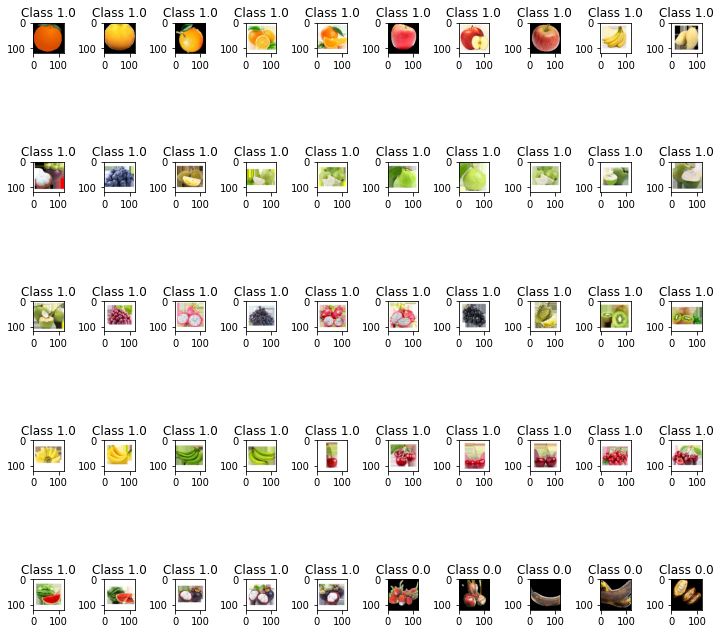

In [706]:

plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

for i in range(50):
    plt.subplot(5,10,i+1)
    img_array = X[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y[i]))
    
plt.tight_layout()

แบ่งข้อมูล train data และ test data

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print(type(X_train))
print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (53, 120, 120, 3)
y_train shape (53,)
X_test shape (24, 120, 120, 3)
y_test shape (24,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [708]:
X_train

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

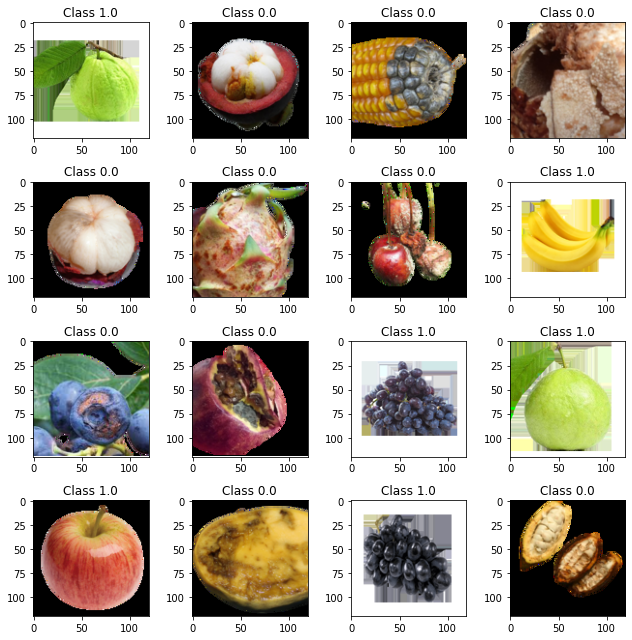

In [709]:

plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X_train[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y_train[i]))
    
plt.tight_layout()

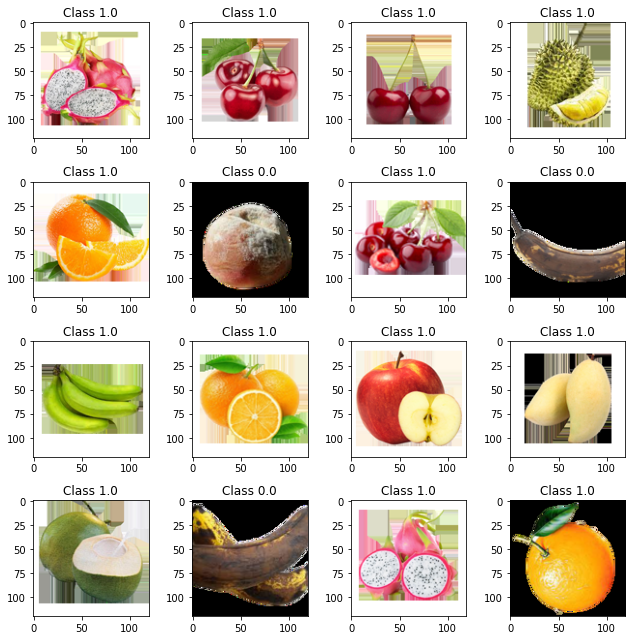

In [710]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X_test[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y_test[i]))
    
plt.tight_layout()

In [711]:
X_train = X_train.reshape(len_train, x_vector) 
X_test = X_test.reshape(len_test, x_vector)   

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                    
X_test /= 255  # it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (53, 43200)
Testing matrix shape (24, 43200)


In [712]:
X_train

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.8784314 , 0.27058825,
        0.4509804 ]], dtype=float32)

In [713]:
nb_classes = 2 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

y_train shape (53,)
y_test shape (24,)


Prepare the test and train Data

#Neural Network using Tensorflow
กำหนดจำนวน class ที่ต้องการใน Y_train และ Y_test (Y ตัวใหญ่)

Input layer


In [714]:
#Neural Network using Tensorflow
model = Sequential()
model.add(Dense(10, input_shape=(x_vector,))) 
model.add(Activation('relu'))
#model.add(Dropout(0.2))

Hidden Layer

In [715]:
model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

Output Layer

In [716]:
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                432010    
                                                                 
 activation_42 (Activation)  (None, 10)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 activation_43 (Activation)  (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 2)                 22        
                                                                 
 activation_44 (Activation)  (None, 2)                 0         
                                                                 
Total params: 432,142
Trainable params: 432,142
Non-t

Complie model

In [717]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Learning 

In [718]:
history = model.fit(X_train, Y_train, batch_size=5, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
11/11 [==============================] - 1s 52ms/step - loss: 0.8924 - accuracy: 0.7170 - val_loss: 0.1864 - val_accuracy: 0.9583
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.9057 - val_loss: 0.1980 - val_accuracy: 0.9167
Epoch 3/10
11/11 [==============================] - 0s 8ms/step - loss: 0.4239 - accuracy: 0.8491 - val_loss: 0.1550 - val_accuracy: 0.9583
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.3598 - accuracy: 0.8679 - val_loss: 0.1481 - val_accuracy: 0.9583
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 0.2067 - accuracy: 0.9245 - val_loss: 0.1527 - val_accuracy: 0.9583
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 0.1824 - accuracy: 0.9245 - val_loss: 0.1586 - val_accuracy: 0.9583
Epoch 7/10
11/11 [==============================] - 0s 8ms/step - loss: 0.1573 - accuracy: 0.9245 - val_loss: 0.1515 - val_accuracy: 0.9583
Epoch 8/10
11/11 [=

Evaluation

In [719]:
score1 = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.1913250833749771
Test accuracy :  0.9583333134651184


In [720]:
model.save('/content/drive/MyDrive/Colab Notebooks/dataset/Savemodel/my_model.h5')

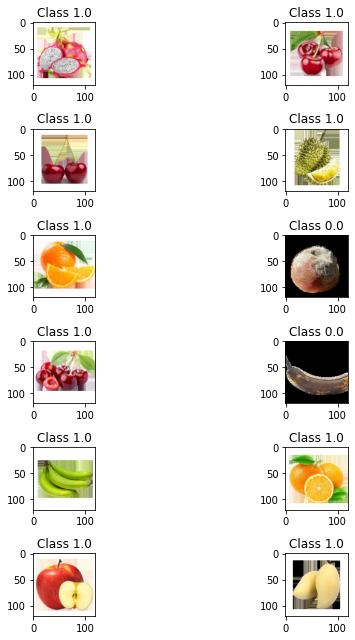

In [721]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(12):
    plt.subplot(6,2,i+1)
    plt.imshow(X_test[i].reshape(120,120,3))
    plt.title("Class {}".format(y_test[i]))  
plt.tight_layout()

In [722]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [723]:
import os

import tensorflow as tf
from tensorflow import keras

In [724]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

path = "/content/drive/MyDrive/Colab Notebooks/dataset/test"
files = os.listdir(path)
i=0

X =  np.empty([0])

for filename in files:
    print(path+"/"+filename)
    # load the image
    img = load_img(path+"/"+filename)
    i+=1
    #print(type(img))
    #print(img.format)
    #print(img.mode)
    
    img = img.resize((120,120))
    print(img.size)
    img.show()


    # convert to numpy array
    img_array = img_to_array(img)   
   
    X = np.append (X,img_array)

/content/drive/MyDrive/Colab Notebooks/dataset/test/orange.jpg
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/test/lumyai.jpg
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/test/lumyainow.jpg
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/test/apple.jpg
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/test/vegetable.jpg
(120, 120)
/content/drive/MyDrive/Colab Notebooks/dataset/test/pak.jpg
(120, 120)


In [725]:
X = X.reshape(i,120,120,3) #create 16 array list, new shape (120*120) , list ละ 3 แถว
x_vector = 120*120*3

In [726]:
X = X.reshape(i, x_vector)
X

array([[255., 255., 255., ..., 255., 255., 255.],
       [250., 254., 255., ..., 241., 248., 251.],
       [ 34.,  61.,  26., ...,  68.,  70.,  46.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [154., 178., 137., ...,  82., 107.,  95.]])

In [727]:
X = X.astype('float32')

In [728]:
X /= 255
print("Training matrix shape", X.shape)

Training matrix shape (6, 43200)


In [729]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/dataset/Savemodel/my_model.h5')

In [730]:
import keras
print(keras.backend.backend()) 
import tensorflow as tf
print(tf.__version__)

tensorflow
2.7.0


In [731]:
tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = new_model.predict(X)
for i in range(6):
  print(np.argmax(result[i]))

1
1
0
1
1
1


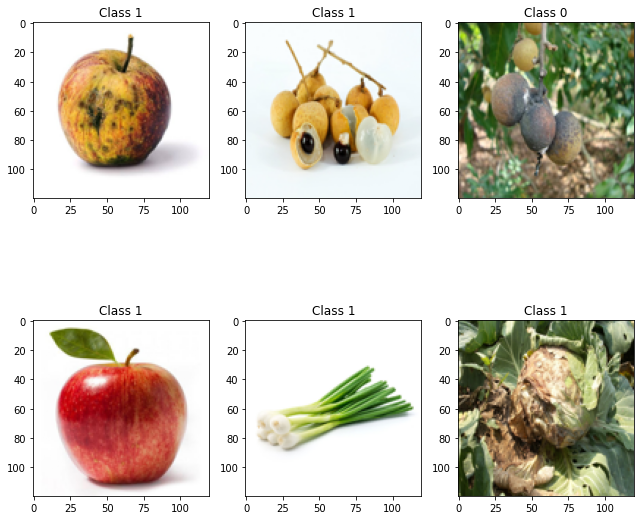

In [732]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X[i].reshape(120,120,3))
    plt.title("Class {}".format(np.argmax(result[i])))  
plt.tight_layout()